Importing Dataset

In [109]:
#Importing Libraries:
import numpy as np
import pandas as pd

In [110]:
#Reading csv file and converting it in dataframe
ds=pd.read_excel("Data_Train.xlsx")
ds1= pd.read_excel("Test_set.xlsx")
train=pd.DataFrame(ds)
test=pd.DataFrame(ds1)

In [111]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Dataset in Dataframe format.
Regression Model

In [112]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


test dataset in dataframe.

In [113]:
# Rows & Columns in  Train dataset:
train.shape

(10683, 11)

Rows: 10683, Column: 11 of Train dataset

In [114]:
# Rows & Columns in  Test dataset:
test.shape

(2671, 10)

Rows: 2671, Column: 10 of test dataset

In [115]:
# Datatype of  Train dataset

train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

10 object datatype , 1 numeric datatype

In [116]:
# Datatype of  Test dataset

test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

10 object datatype 

In [117]:
# Information about Train Dataset:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Route and Total_Stops have 1 null value each
Target column is Price

In [118]:
# Information about Test Dataset:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


2671 total count and no null values present.

In [119]:
#Null value in Train dataset

train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route and Total_Stops have 1 null value so need to drop them.

In [120]:
train.dropna(inplace = True)
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Null value dropped

In [121]:
#Null value in Test dataset

test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null value

# Data Pre-Processing:

In [123]:
train['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

## Converting object to datetime datatypes

In [124]:
train["Journey_day"] = pd.to_datetime(train["Date_of_Journey"], format="%d/%m/%Y").dt.day
test["Journey_day"] = pd.to_datetime(test["Date_of_Journey"], format="%d/%m/%Y").dt.day

day extracted from date 

In [125]:
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format ="%d/%m/%Y").dt.month
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format ="%d/%m/%Y").dt.month

month extracted from date

In [126]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Journey_month and Journey_day column added.

In [127]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


Journey_month and Journey_day column added.

### Dropping Date_of_Journey column from dataset:

In [128]:
train.drop(["Date_of_Journey"], axis = 1, inplace = True)
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [129]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Date_of_Journey column dropped

In [130]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


Date_of_Journey column dropped

In [133]:
train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

Dep_Time column values

In [134]:
train["Depart_Hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
test["Depart_Hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour

departure Hour extracted from  departure time.

In [135]:
train["Depart_Min"] = pd.to_datetime(train["Dep_Time"]).dt.minute
test["Depart_Min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

departure minute extracted from  departure time.

In [136]:
train.drop(["Dep_Time"], axis = 1, inplace = True)
train.head()

test.drop(["Dep_Time"], axis = 1, inplace = True)


In [137]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Depart hour and Depart time column  added 
Dep_Time column dropped.

In [138]:
# Arrival time is separated into arrival hour and arrival minute:

train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [139]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Arrival time is separated into arrival hour and arrival minute

In [140]:
# Arrival time is separated into arrival hour and arrival minute:

test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour

test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute

test.drop(["Arrival_Time"], axis = 1, inplace = True)

Arrival time is separated into arrival hour and arrival minute

In [141]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


arrival time column dropped as arrival hour and arrival minute column added.

In [143]:
# Separating hours and minutes from duration column from train dataset.
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

duration column is separated into hours and minutes in train dataset.

In [144]:
# Adding duration_hours and duration_mins list to train_data dataframe

train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

Added duration_hours and duration_mins column to train dataframe

In [145]:
# Separating hours and minutes from duration column from test datatype.
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

duration column is separated into hours and minutes in test dataset

In [146]:
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

Added duration_hours and duration_mins column to test dataframe

In [147]:
#dropping duration column:

train.drop(["Duration"], axis = 1, inplace = True)
test.drop(["Duration"], axis = 1, inplace = True)

In [148]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


dropped duration column

# EDA:

## Visualization:

In [149]:
#Importing plotting libraries:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Plotting Numeric datatype:

<AxesSubplot:xlabel='Price', ylabel='Density'>

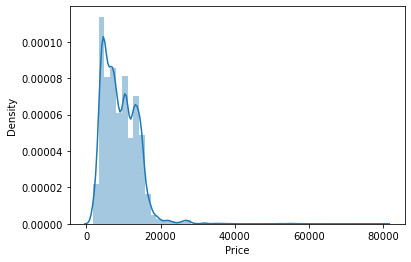

In [42]:
sns.distplot(train['Price'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Journey_day', ylabel='Density'>

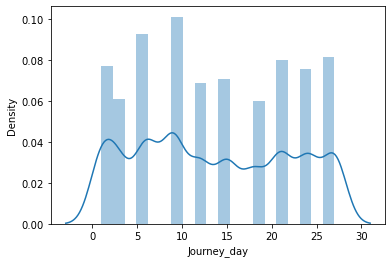

In [43]:
sns.distplot(train['Journey_day'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Journey_month', ylabel='Density'>

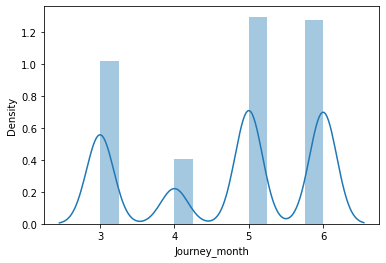

In [44]:
sns.distplot(train['Journey_month'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Depart_Hour', ylabel='Density'>

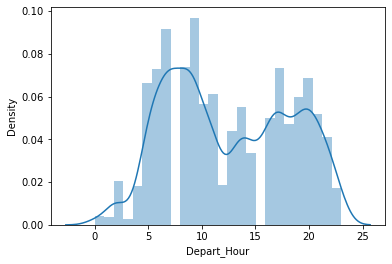

In [45]:
sns.distplot(train['Depart_Hour'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Depart_Min', ylabel='Density'>

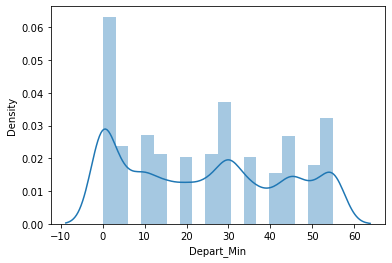

In [46]:
sns.distplot(train['Depart_Min'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Duration_hours', ylabel='Density'>

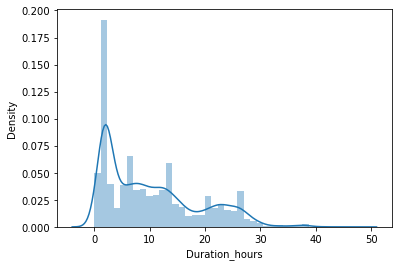

In [47]:
sns.distplot(train['Duration_hours'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Duration_mins', ylabel='Density'>

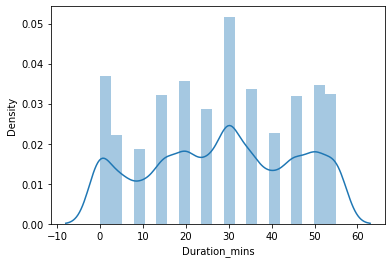

In [48]:
sns.distplot(train['Duration_mins'], kde=True)

Data is not equally distributed and has skewness

## Plotting categorical datatype:

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


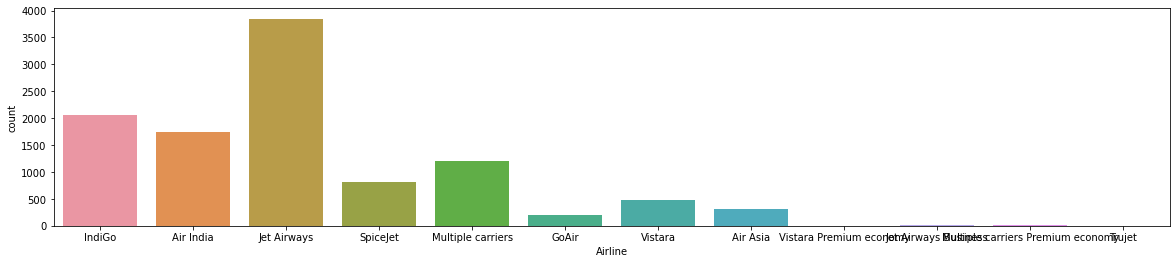

In [49]:
plt.figure(figsize=(20,4))
ax=sns.countplot(x="Airline", data=train)
print(train["Airline"].value_counts())

Jet Airways has highest number of count

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


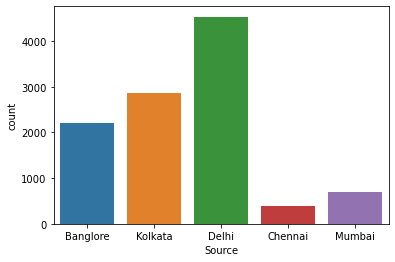

In [50]:
ax=sns.countplot(x="Source", data=train)
print(train["Source"].value_counts())

Maximum count source is Delhi

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


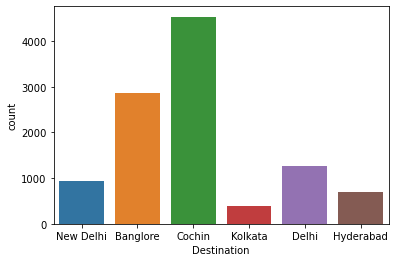

In [51]:
ax=sns.countplot(x="Destination", data=train)
print(train["Destination"].value_counts())

Maximum people travelling to Cochin

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


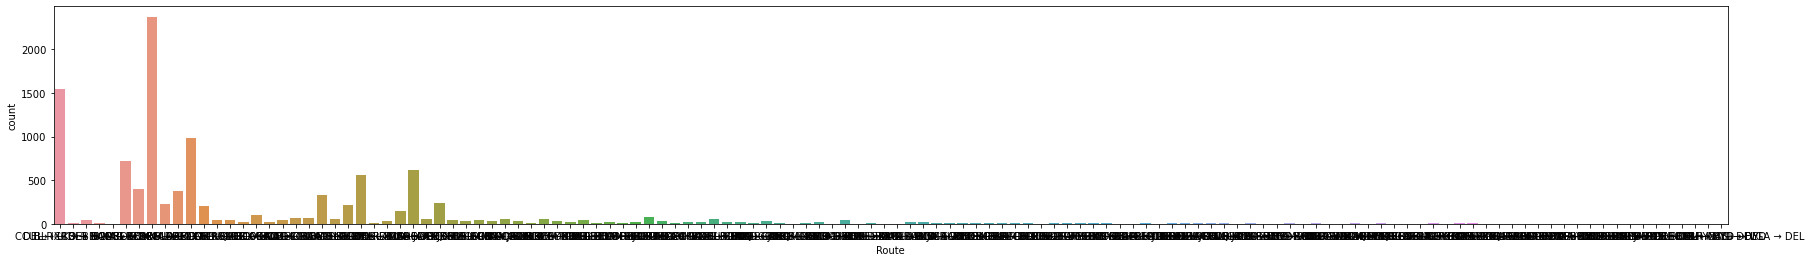

In [52]:
plt.figure(figsize=(30,4))
ax=sns.countplot(x="Route", data=train)
print(train["Route"].value_counts())

Maximum passenger travelled DEL → BOM → COK route.

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


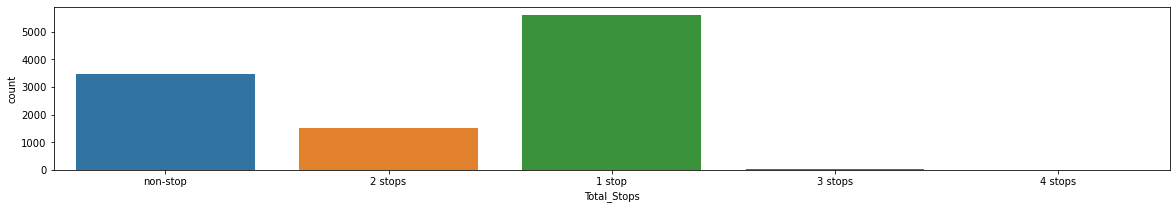

In [53]:
plt.figure(figsize=(20,3))
ax=sns.countplot(x="Total_Stops", data=train)
print(train["Total_Stops"].value_counts())

Maximum passenger booked 1 stop flight routes.

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


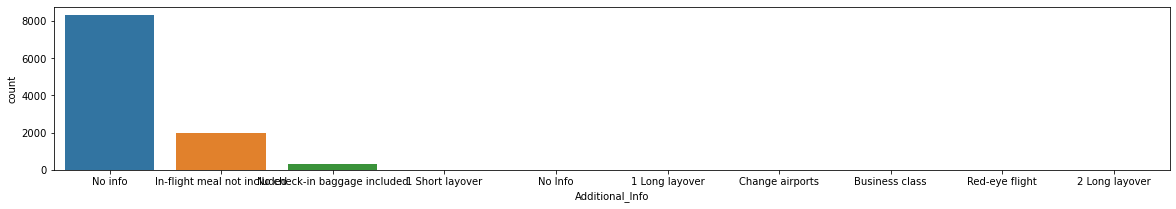

In [54]:
plt.figure(figsize=(20,3))
ax=sns.countplot(x="Additional_Info", data=train)
print(train["Additional_Info"].value_counts())

There are maximum count of no info

<Figure size 1440x360 with 0 Axes>

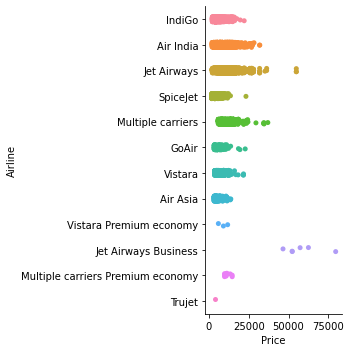

In [55]:
plt.figure(figsize=(20,5))
sns.catplot(x = "Price", y = "Airline", data = train)

Maximum price is of jet airways

<Figure size 1440x360 with 0 Axes>

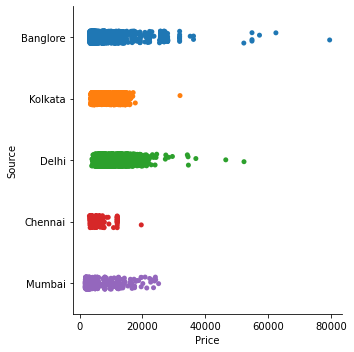

In [56]:
plt.figure(figsize=(20,5))
sns.catplot(x = "Price", y = "Source", data = train)

Price of Delhi source is high

<Figure size 1440x360 with 0 Axes>

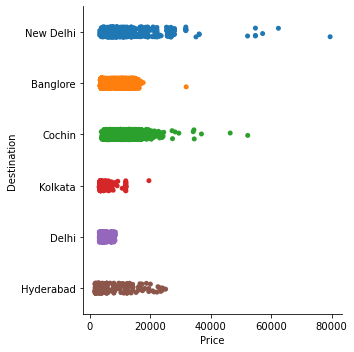

In [57]:
plt.figure(figsize=(20,5))
sns.catplot(x = "Price", y = "Destination", data = train)

Common range in all destination lies between 0 to 100000

<Figure size 1440x360 with 0 Axes>

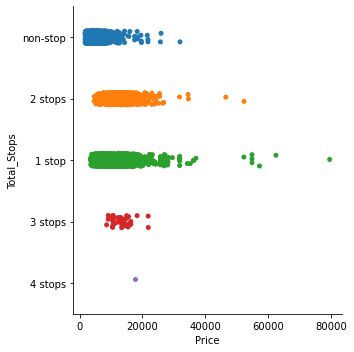

In [58]:
plt.figure(figsize=(20,5))
sns.catplot(x = "Price", y = "Total_Stops", data = train)

Maximum prices are for 1 stop 

<AxesSubplot:xlabel='Destination', ylabel='Total_Stops'>

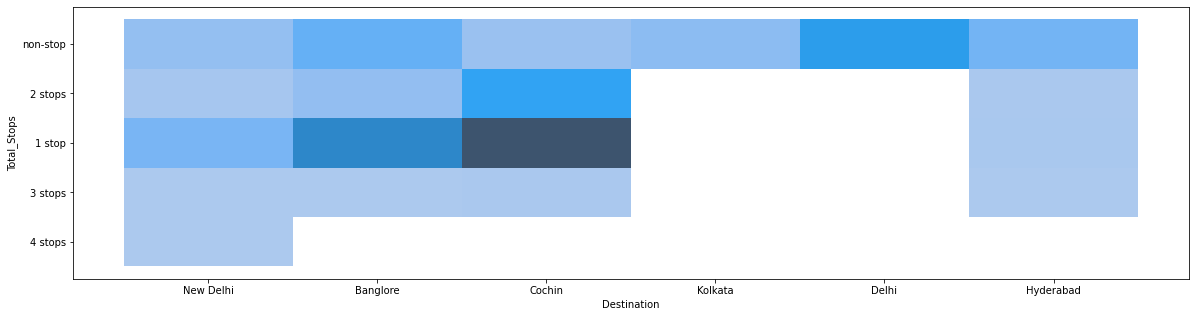

In [152]:
plt.figure(figsize=(20,5))
sns.histplot(x = "Destination", y = "Total_Stops", data = train)

Maximum 1 stops are in Cochin

<AxesSubplot:xlabel='Price', ylabel='Depart_Hour'>

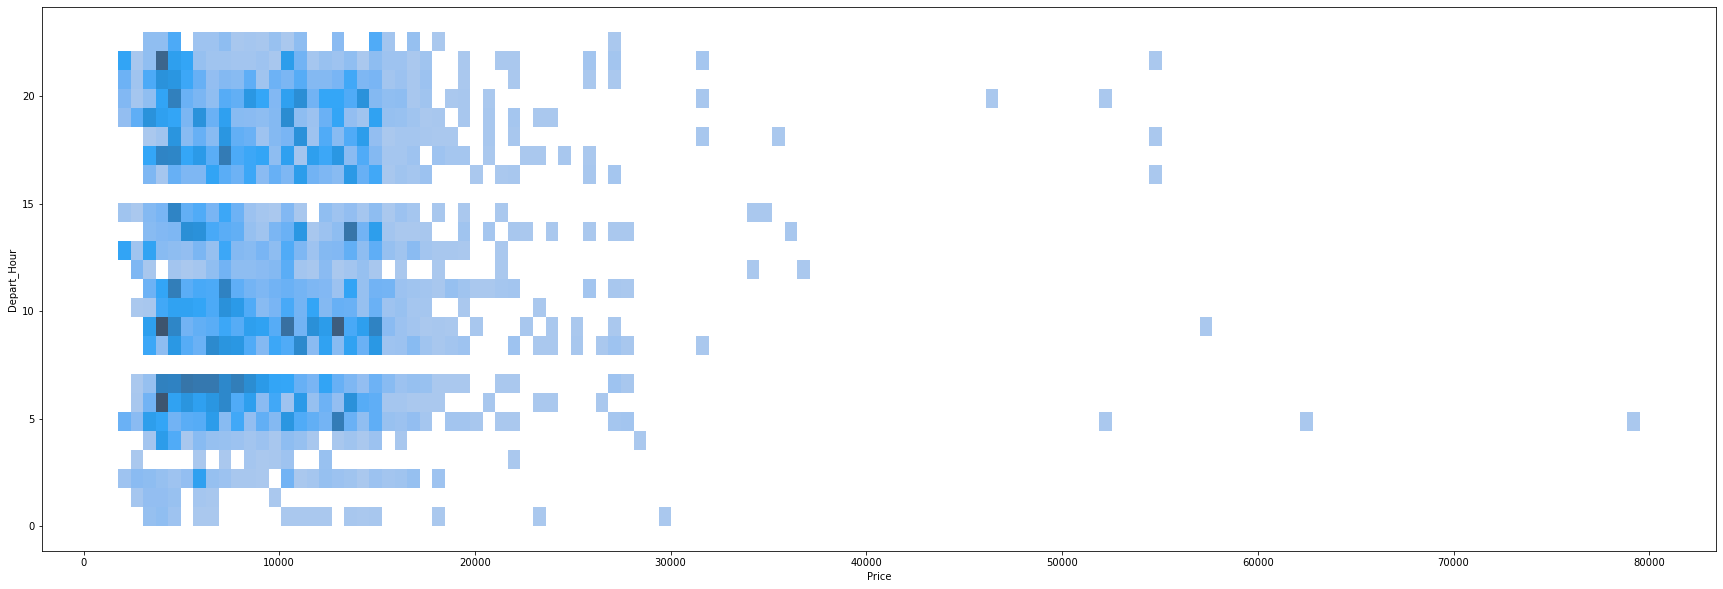

In [156]:
plt.figure(figsize=(30,10))
sns.histplot(x = "Price", y = "Depart_Hour", data = train)

Maximum price is between 0 to 20000

## Encoding

### Label Encoding

In [157]:
# Label Encoding for object to numeric datatype:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
for i in train.columns:
    if train[i].dtypes=="object":
        train[i]=en.fit_transform(train[i].values.reshape(-1,1))

In [158]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,18,4,8,3897,24,3,22,20,1,10,2,50
1,1,3,0,84,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,29,0,8,13302,1,3,16,50,21,35,4,45


Object datatype encoded to numeric datatype

In [159]:
# Route and Total_Stops are related to each other
train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [160]:
#Test dataset:
# Label Encoding for object to numeric datatype:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
for i in test.columns:
    if test[i].dtypes=="object":
        test[i]=en.fit_transform(test[i].values.reshape(-1,1))

Object datatype encoded to numeric datatype

## Describing the dataset


In [161]:
train.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,1.458248,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,2.352090,1.177276,1.474845,1.806320,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,0.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,4.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


Key Observations:

    1. Mean and Median: Values of mean and median have differences alternatively so skewness are present.
    2. 75% percentile and max: price and duration_hours have highest outliers.
    3. Standard deviation is less than mean so high peak data.

<AxesSubplot:>

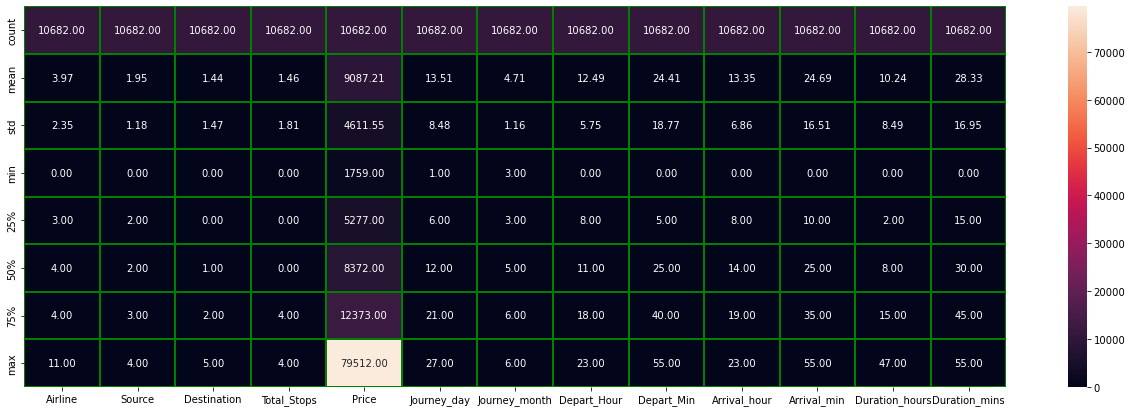

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(train.describe(),annot=True,linewidths=0.1,linecolor="Green",fmt="0.2f")

Heatmap representation of dataset description

## Outliers:

Airline              AxesSubplot(0.125,0.816017;0.227941x0.0639831)
Source            AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
Destination       AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
Total_Stops          AxesSubplot(0.125,0.739237;0.227941x0.0639831)
Price             AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
Journey_day       AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
Journey_month        AxesSubplot(0.125,0.662458;0.227941x0.0639831)
Depart_Hour       AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
Depart_Min        AxesSubplot(0.672059,0.662458;0.227941x0.0639831)
Arrival_hour         AxesSubplot(0.125,0.585678;0.227941x0.0639831)
Arrival_min       AxesSubplot(0.398529,0.585678;0.227941x0.0639831)
Duration_hours    AxesSubplot(0.672059,0.585678;0.227941x0.0639831)
Duration_mins        AxesSubplot(0.125,0.508898;0.227941x0.0639831)
dtype: object

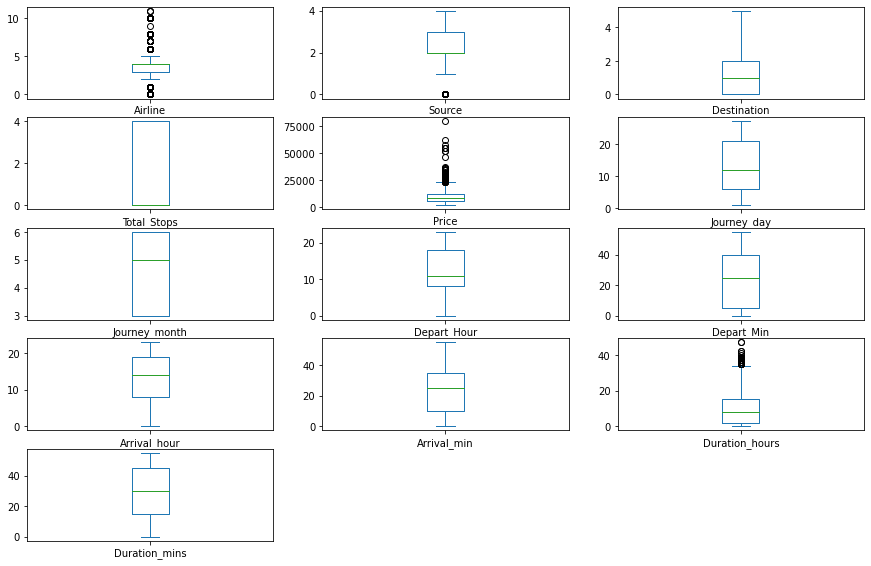

In [163]:
#Outliers:

train.plot(kind='box',subplots=True,layout=(10,3),figsize=(15,20))

Airline, source,price and duration_hours have outliers

In [164]:
# Removing Outliers: 

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(train))
threshold=3
np.where(z>3)

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
          785,   826,   936,   946,   959,   966,   969,   975,  1067,
         1113,  1196,  1246,  1341,  1346,  1424,  1442,  1466,  1478,
         1496,  1551,  1629,  1654,  1657,  1785,  1791,  1804,  1918,
         2055,  2099,  2108,  2172,  2495,  2553,  2556,  2618,  2635,
         2641,  2654,  2693,  2718,  2924,  3032,  3111,  3257,  3400,
         3457,  3535,  3700,  3790,  3815,  3966,  4012,  4047,  4118,
         4463,  4521,  4655,  4676,  4829,  5013,  5136,  5372,  5439,
         5516,  5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,
         5782,  5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,
         6407,  6476,  6576,  6588,  6605,  6884,  6991,  7189,  7232,
         7306,  7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,
         7612,  7617,  7713,  7724,  7756,  7876,  7902,  7906,  8020,
         8080,  8127,  8153,  8360,  8409,  8412,  8451,  8470,  8536,
      

In [165]:
#removing value greater than threshold value 

df_new=train[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,9,4,19,55,22,25,2,30
10679,1,3,0,4,4145,27,4,20,45,23,20,2,35
10680,4,0,2,4,7229,27,4,8,20,11,20,3,0
10681,10,0,5,4,12648,1,3,11,30,14,10,2,40


Outliers removed

In [166]:
train=df_new

In [167]:
train.shape

(10521, 13)

Rows: 10521 ; Column: 13

#### Percentage Loss of data: Train dataset

In [168]:
Data_loss=((10683-10521)/10683)*100
Data_loss

1.5164279696714407

1.51% loss data

## Correlation of the columns with the target columns:

In [169]:
train.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.014488,0.020697,0.036299,-0.042583,0.025141,0.021487,-0.042520,-0.061117,-0.001006,-0.074158,-0.145318,-0.033388
Source,-0.014488,1.000000,-0.584031,-0.236797,0.075937,-0.010908,0.172574,0.060039,-0.049817,0.025347,0.020242,0.176181,-0.147873
Destination,0.020697,-0.584031,1.000000,0.358594,-0.173577,-0.017782,-0.352854,-0.075581,0.119674,-0.040670,0.017689,-0.277360,0.063111
Total_Stops,0.036299,-0.236797,0.358594,1.000000,-0.623413,0.021379,-0.036800,0.038040,0.053080,-0.097484,0.176990,-0.626323,0.183025
Price,-0.042583,0.075937,-0.173577,-0.623413,1.000000,-0.116278,-0.044379,0.012319,-0.054309,0.034285,-0.101690,0.580364,-0.136245
Journey_day,0.025141,-0.010908,-0.017782,0.021379,-0.116278,1.000000,-0.056871,0.000858,-0.003298,-0.003760,-0.017888,-0.018311,-0.010015
Journey_month,0.021487,0.172574,-0.352854,-0.036800,-0.044379,-0.056871,1.000000,0.034783,-0.053497,-0.002052,-0.099653,0.038114,-0.044709
Depart_Hour,-0.042520,0.060039,-0.075581,0.038040,0.012319,0.000858,0.034783,1.000000,-0.027397,0.013533,0.068471,0.027613,-0.031144
Depart_Min,-0.061117,-0.049817,0.119674,0.053080,-0.054309,-0.003298,-0.053497,-0.027397,1.000000,0.045337,-0.018266,-0.022464,0.091387
Arrival_hour,-0.001006,0.025347,-0.040670,-0.097484,0.034285,-0.003760,-0.002052,0.013533,0.045337,1.000000,-0.154379,0.042281,-0.114901


correlation of input with target variables

<AxesSubplot:>

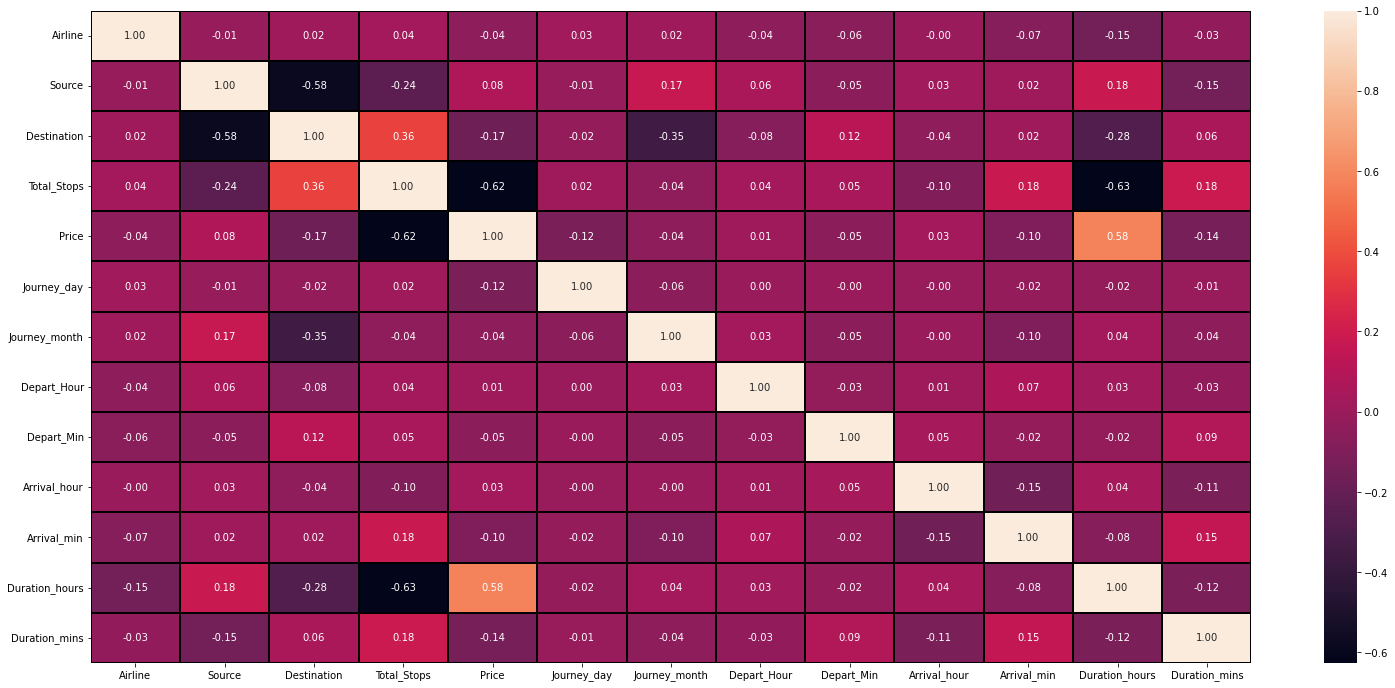

In [170]:
plt.figure(figsize=(26,12))
sns.heatmap(train.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Key Observation:
 1. Price has positive correlation with duration_hours and negative correlation with Total_Stops.
 2. duration_hours has positive correlation with Price and negative correlation with Total_Stops.
 3. Multicollinearity exist

In [171]:
train.drop(['Total_Stops'],axis=1,inplace=True)
train.head()

,Airline,Source,Destination,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,3897,24,3,22,20,1,10,2,50
1,1,3,0,7662,1,5,5,50,13,15,7,25
2,4,2,1,13882,9,6,9,25,4,25,19,0
3,3,3,0,6218,12,5,18,5,23,30,5,25
4,3,0,5,13302,1,3,16,50,21,35,4,45


## Separating Target and feature variables

In [172]:
x = train.drop("Price",axis=1)
y = train["Price"]


feature and target separated

### Multicollinearity removal using VIF

In [173]:
# Importing library:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [174]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

VIF technique is used to remove Multicollinearity.

In [175]:
vif_calc()

    VIF Factor        features
0     3.703590         Airline
1     5.036961          Source
2     2.473399     Destination
3     3.373332     Journey_day
4    11.695211   Journey_month
5     5.457842     Depart_Hour
6     2.732148      Depart_Min
7     4.497862    Arrival_hour
8     3.240390     Arrival_min
9     2.555964  Duration_hours
10    3.758067   Duration_mins


Journey_month have high vif so need to drop it.

In [176]:
x.drop(['Journey_month'],axis=1,inplace=True)
x.head()

,Airline,Source,Destination,Journey_day,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,24,22,20,1,10,2,50
1,1,3,0,1,5,50,13,15,7,25
2,4,2,1,9,9,25,4,25,19,0
3,3,3,0,12,18,5,23,30,5,25
4,3,0,5,1,16,50,21,35,4,45


Journey_month column dropped.

## Skewness:

In [177]:
x.skew()

Airline           0.729344
Source           -0.436831
Destination       1.261683
Journey_day       0.108835
Depart_Hour       0.103062
Depart_Min        0.171333
Arrival_hour     -0.362282
Arrival_min       0.107285
Duration_hours    0.764223
Duration_mins    -0.097210
dtype: float64

Taking +/-0.5 as range of skewness 
Destination,Duration_hours and Airline have skewness.

## Using power_transform to remove skewness.

In [178]:
# Using power_transform to remove skewness.

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Using 'power_transform' method for removing skewness

In [179]:
# converting ndarray to dataframe
x=pd.DataFrame(x)

Skewness removed

# Scaling Data

In [180]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
print('x',x)

x [[-0.30134153 -1.61080416  1.77316412 ... -0.77237076 -1.16739911
   1.19569185]
 [-1.42397584  0.89537399 -1.36353513 ... -0.42968588 -0.04145063
  -0.10606226]
 [ 0.14140597 -0.02576902  0.0196569  ...  0.15829935  1.09886243
  -1.87885535]
 ...
 [ 0.14140597 -1.61080416  0.72381217 ... -0.12327569 -0.84684248
  -1.87885535]
 [ 2.11623962 -1.61080416  1.77316412 ... -0.77237076 -1.16739911
   0.69875081]
 [-1.42397584 -0.02576902  0.0196569  ... -0.42968588  0.10019367
  -0.3971651 ]]


scaling of features done.

# Model Selection:

# Regression:

In [181]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [182]:
for i in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print(f"At random state {i},the training accuracy is:- {r2_score(train_y,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(test_y,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.46890742791859463
At random state 0,the testing accuracy is:- 0.4749376602263471


At random state 1,the training accuracy is:- 0.47009368567545096
At random state 1,the testing accuracy is:- 0.46957944294921294


At random state 2,the training accuracy is:- 0.4725966498946861
At random state 2,the testing accuracy is:- 0.4604400357900711


At random state 3,the training accuracy is:- 0.46444339052250694
At random state 3,the testing accuracy is:- 0.4928944754701554


At random state 4,the training accuracy is:- 0.47311454214616466
At random state 4,the testing accuracy is:- 0.45833870842975954


At random state 5,the training accuracy is:- 0.4717753996472007
At random state 5,the testing accuracy is:- 0.4638051399432299


At random state 6,the training accuracy is:- 0.469819184047775
At random state 6,the testing accuracy is:- 0.47098373256351744


At random state 7,the training accuracy is:- 0.4683739677961748
At random state 7,the testi

At random state 62,the testing accuracy is:- 0.4645822612532682


At random state 63,the training accuracy is:- 0.468201653040199
At random state 63,the testing accuracy is:- 0.4777999695962616


At random state 64,the training accuracy is:- 0.4732485759954552
At random state 64,the testing accuracy is:- 0.45782508945593114


At random state 65,the training accuracy is:- 0.464778336507334
At random state 65,the testing accuracy is:- 0.49163655336116807


At random state 66,the training accuracy is:- 0.47137021935093215
At random state 66,the testing accuracy is:- 0.4647452141645738


At random state 67,the training accuracy is:- 0.46526944476089904
At random state 67,the testing accuracy is:- 0.48929389724623706


At random state 68,the training accuracy is:- 0.4737116724638716
At random state 68,the testing accuracy is:- 0.4555885445805947


At random state 69,the training accuracy is:- 0.47252082983505184
At random state 69,the testing accuracy is:- 0.46083406523739623


At random st

In [183]:
lr.fit(train_x,train_y)
lr.score(test_x,test_y)

0.46235926824105567

46.2% is Linear regression score

In [184]:
#Predicted data
pred=lr.predict(test_x)
pred

array([ 8304.5569359 ,  6060.05872385, 13260.75295037, ...,
       13303.59108806, 10631.78500794,  9427.67655737])

In [185]:
print("Mean squared error:",mean_squared_error(test_y,pred))
print("Mean absolute error:",mean_absolute_error(test_y,pred))
print("R2Score:",r2_score(test_y,pred))

Mean squared error: 8626933.006987985
Mean absolute error: 2287.0548862102605
R2Score: 0.46235926824105567


In [186]:
Train_accuracy=r2_score(train_y,pred_train)
Test_accuracy=r2_score(test_y,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.46819839425094395 and accuracy score for training is 0.471830953246104 and accuracy for the testing is 0.46235926824105567


At cross fold 3 the cv score is 0.46819654015129714 and accuracy score for training is 0.471830953246104 and accuracy for the testing is 0.46235926824105567


At cross fold 4 the cv score is 0.46877708333505136 and accuracy score for training is 0.471830953246104 and accuracy for the testing is 0.46235926824105567


At cross fold 5 the cv score is 0.46817350766839166 and accuracy score for training is 0.471830953246104 and accuracy for the testing is 0.46235926824105567


At cross fold 6 the cv score is 0.46803964016650856 and accuracy score for training is 0.471830953246104 and accuracy for the testing is 0.46235926824105567


At cross fold 7 the cv score is 0.4682774053280574 and accuracy score for training is 0.471830953246104 and accuracy for the testing is 0.46235926824105567


At cross fold 8 the cv score is 0.4685767777758

cv score for training and testing 

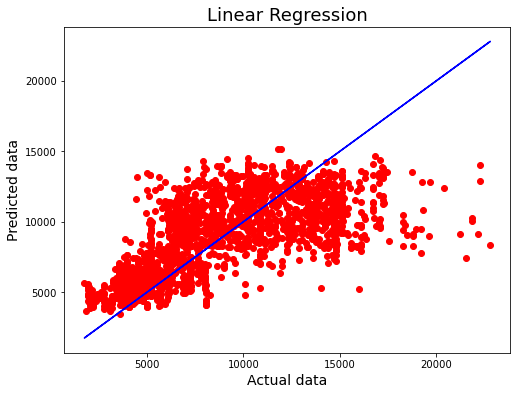

In [188]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_test, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Plotting of Predicted and actual data

In [189]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [190]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


Best parameters for Linear Regression

In [191]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)
print('ls score',ls.score(train_x,train_y))
pred_ls = ls.predict(test_x)

r2s = r2_score(test_y,pred_ls)
print('r2 score',r2s*100)

ls score 0.4718303351934975
r2 score 46.239376745181914


Ls score is 47% and r2score is 46.2%

In [192]:
cv_score=cross_val_score(ls,x,y,cv=9)
cv_mean=cv_score.mean()
cv_mean

0.4684604377542522

cv score is 46.8%

## 1. Random Forest Regressor

In [206]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

KeyboardInterrupt: 

Best parameters for Random Forest Regressor

In [ ]:
rf= RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(train_x,train_y)
rf.score(train_x,train_y)
predrf = rf.predict(test_x)
print('rf score',rf.score(train_x,train_y))
rfs = r2_score(test_y,predrf)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=9)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)
print("Mean squared error:",mean_squared_error(test_y,predrf))
print("Mean absolute error:",mean_absolute_error(test_y,predrf))

rf score 96.9% R2 Score: 77% Cross Val Score: 79%

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predrf, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

## 2. Decision Tree Regressor

In [194]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto","sqrt", "log2"],
              'max_depth':[2,4,8,10,None],
            'min_samples_split':[0.25,0.5,1.0]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 0.25}


Best parameters for DecisionTreeRegressor

In [195]:
dt =DecisionTreeRegressor(criterion="mse",max_features="auto",max_depth=4,min_samples_split=0.25)
dt.fit(train_x,train_y)
dt.score(train_x,train_y)
predt = dt.predict(test_x)
print('dt score',dt.score(train_x,train_y))
dts = r2_score(test_y,predt)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=9)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)
print("Mean squared error:",mean_squared_error(test_y,predt))
print("Mean absolute error:",mean_absolute_error(test_y,predt))

dt score 0.5748261178523932
R2 Score: 57.44939504192429
Cross Val Score: 57.3670526601317
Mean squared error: 6827630.361620626
Mean absolute error: 1999.9675229435238


dt score is 57.4% , r2score is 57.4% and cross val score is 57.3%

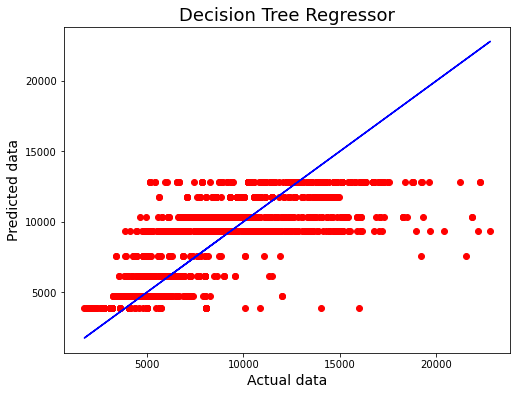

In [196]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predt, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

Plotting of Predicted and actual data

## 3. KNeighborsRegressor

In [197]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }
kn =KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


Best parameters for KNeighborsRegressor 

In [198]:
kn =KNeighborsRegressor(n_neighbors=5,algorithm="auto",weights='uniform')
kn.fit(train_x,train_y)
kn.score(train_x,train_y)
predkn = kn.predict(test_x)
print('kn score',kn.score(train_x,train_y))
kns = r2_score(test_y,predkn)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=9)
knc = knscore.mean()
print('Cross Val Score:',knc*100)
print("Mean squared error:",mean_squared_error(test_y,predkn))
print("Mean absolute error:",mean_absolute_error(test_y,predkn))

kn score 0.8120831760470775
R2 Score: 71.28934237278118
Cross Val Score: 70.97587619509886
Mean squared error: 4606885.328912115
Mean absolute error: 1504.0095011876485


kn score 81.2%
R2 Score: 71.2%
Cross Val Score: 70.9%

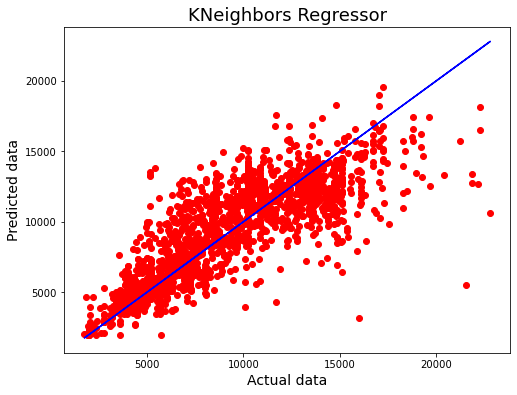

In [199]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predkn, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

Plotting of Predicted and actual data

## 4. SVRegressor

In [203]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
svr =SVR()
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]

clf = GridSearchCV(svr,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'C': 10000, 'gamma': 0.2, 'kernel': 'rbf'}


Best parameters for SV Regressor

In [204]:
svr =SVR(C=10000,gamma=0.2,kernel='rbf')
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
predsvr = svr.predict(test_x)
print('svr score',svr.score(train_x,train_y))
svrs = r2_score(test_y,predsvr)
print('R2 Score:',svrs*100)

svrscore = cross_val_score(svr,x,y,cv=9)
svrc = svrscore.mean()
print('Cross Val Score:',svrc*100)
print("Mean squared error:",mean_squared_error(test_y,predsvr))
print("Mean absolute error:",mean_absolute_error(test_y,predsvr))

svr score 0.7811033272211924
R2 Score: 68.54252360832217
Cross Val Score: 70.56241978723973
Mean squared error: 5047637.304414408
Mean absolute error: 1463.1074223309467


svr score = 78.1%
r2score = 68.5%
cross val score = 70.5%

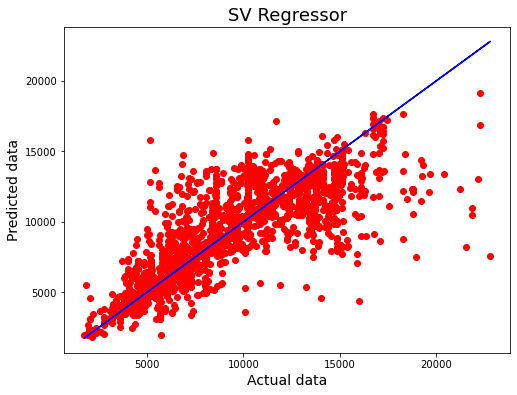

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predsvr, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('SV Regressor',fontsize=18)
plt.show()

Plotting of Predicted and actual data

## Best Model is KNeighbor Regressor as its r2 score and cross val score has less difference.
Although Decision tree regressor r2 score and cross val score is smaller than KNeighbor but its mean square error value is very high so thats why KNeighbor is the best model.

# Model saving:

In [209]:
import pickle
filename = 'flight_prices.pkl'
pickle.dump(kn, open(filename, 'wb'))

## Accuracy

In [210]:
loaded_model = pickle.load(open('flight_prices.pkl','rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.7128934237278117


71.2% accuracy of model.

## Conclusion:

In [202]:
import numpy as np
a=np.array(test_y)
predkn =np.array(kn.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": predkn},index=range(len(a)))
df_com

,original,predicted
0,8882,10182.8
1,4239,3938.6
2,13882,13247.8
3,3383,3923.2
4,5277,5889.0
...,...,...
2100,11087,11664.6
2101,14441,14222.8
2102,9535,11644.2
2103,10262,10968.4


Model is able to predict the value approximately same as the actual value as the accuracy score of the model is 71.2%